<a href="https://colab.research.google.com/github/iopenattheclose/Netflix/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving covid_m1.csv to covid_m1.csv


In [ ]:
import pandas as pd
df = pd.read_csv("covid_m1.csv")

In [ ]:
len(df)

1000

In [ ]:
len(df[df['s']==True])

700

1.Defining the problem statement

To analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

2.To analyze basic metrics, we have to get the data and load it into a dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
path = "/content/drive/MyDrive/Business_case_datasets/netflix_dataset.csv"
df = pd.read_csv(path)
df.head()

FileNotFoundError: ignored

# New Section

In [ ]:
len(df)

8807

In [ ]:
#Getting the type of data in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.shape

(8807, 12)

In [ ]:
#getting list of all columns present in the df
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
#checking how many null values are present in each column in the data
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [ ]:
#getting count of movies in each year sorted in desc order
df['release_year'].value_counts(sort=True)

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [ ]:
df_movie = df[df['type']=="Movie"]
df_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [ ]:
df_movie.index = np.arange(1,df_movie.shape[0]+1)
df_movie.head()
# df_movie.reset_index(drop=True)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
4,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
5,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [ ]:
df_movie.nunique()

show_id         6131
type               1
title           6131
director        4354
cast            5445
country          651
date_added      1533
release_year      73
rating            17
duration         205
listed_in        278
description     6105
dtype: int64

In [ ]:
df_movie['country'].value_counts()

United States                            2058
India                                     893
United Kingdom                            206
Canada                                    122
Spain                                      97
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: country, Length: 651, dtype: int64

In [ ]:
df_show = df[df['type']=="TV Show"]
df_show.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",NaN,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...


In [ ]:
df_show.index = np.arange(1,df_show.shape[0]+1)
df_show.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
7,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
8,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",NaN,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."
9,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
10,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...


In [ ]:
df_show.nunique()

show_id         2676
type               1
title           2676
director         222
cast            2283
country          196
date_added      1051
release_year      46
rating             9
duration          15
listed_in        236
description     2672
dtype: int64

In [ ]:
df_show['country'].value_counts()

United States                                    760
United Kingdom                                   213
Japan                                            169
South Korea                                      158
India                                             79
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: country, Length: 196, dtype: int64

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df_movie.nunique()

show_id         6131
type               1
title           6131
director        4354
cast            5445
country          651
date_added      1533
release_year      73
rating            17
duration         205
listed_in        278
description     6105
dtype: int64

We can see that number of movies produced are greater than number of TV shows produced

In [ ]:
df_movie['rating'].value_counts()

TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

We can say that movies of type TV_MA rating are highest in number implying people prefer such kind of movies

In [ ]:
#Let's manipulate movies df first and see NaN values,fill those and do some analysis
df_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
4,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
5,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [ ]:
#gives movies having nan in duration
df_movie[df_movie['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3563,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3739,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3748,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
#dropping these rows as duration is nan and rating is corrupted
df_movie.dropna(subset=['duration'], how='all', inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df_movie.isnull().sum()

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [ ]:
df_movie[df_movie['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
df_movie['duration'] = df_movie['duration'].str.replace(r'min', '')

<ipython-input-362-87ef1dfdd974>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration'] = df_movie['duration'].str.replace(r'min', '')


In [ ]:
df_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
2,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
4,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
5,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...


In [ ]:
df_movie['duration']  = df_movie['duration'] .astype(float)

<ipython-input-364-ebae8e7b55c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration']  = df_movie['duration'] .astype(float)


In [ ]:
#getting average values of movie duration
df_movie['duration'].mean()

99.57718668407311

In [ ]:
#Now filling NaN values with NOT AVAILABLE
# df_movie.fillna("NOT AVAILABLE",inplace=True)-----Did not run this

In [ ]:
df_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm..."
2,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
4,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104.0,"Comedies, Dramas",A woman adjusting to life after a loss contend...
5,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127.0,"Dramas, International Movies",After most of her family is murdered in a terr...


In [ ]:
df_movie['release_year'].value_counts()
#Plot line chart or bar chart

2018    767
2017    766
2016    658
2019    633
2020    517
       ... 
1966      1
1961      1
1946      1
1963      1
1947      1
Name: release_year, Length: 73, dtype: int64

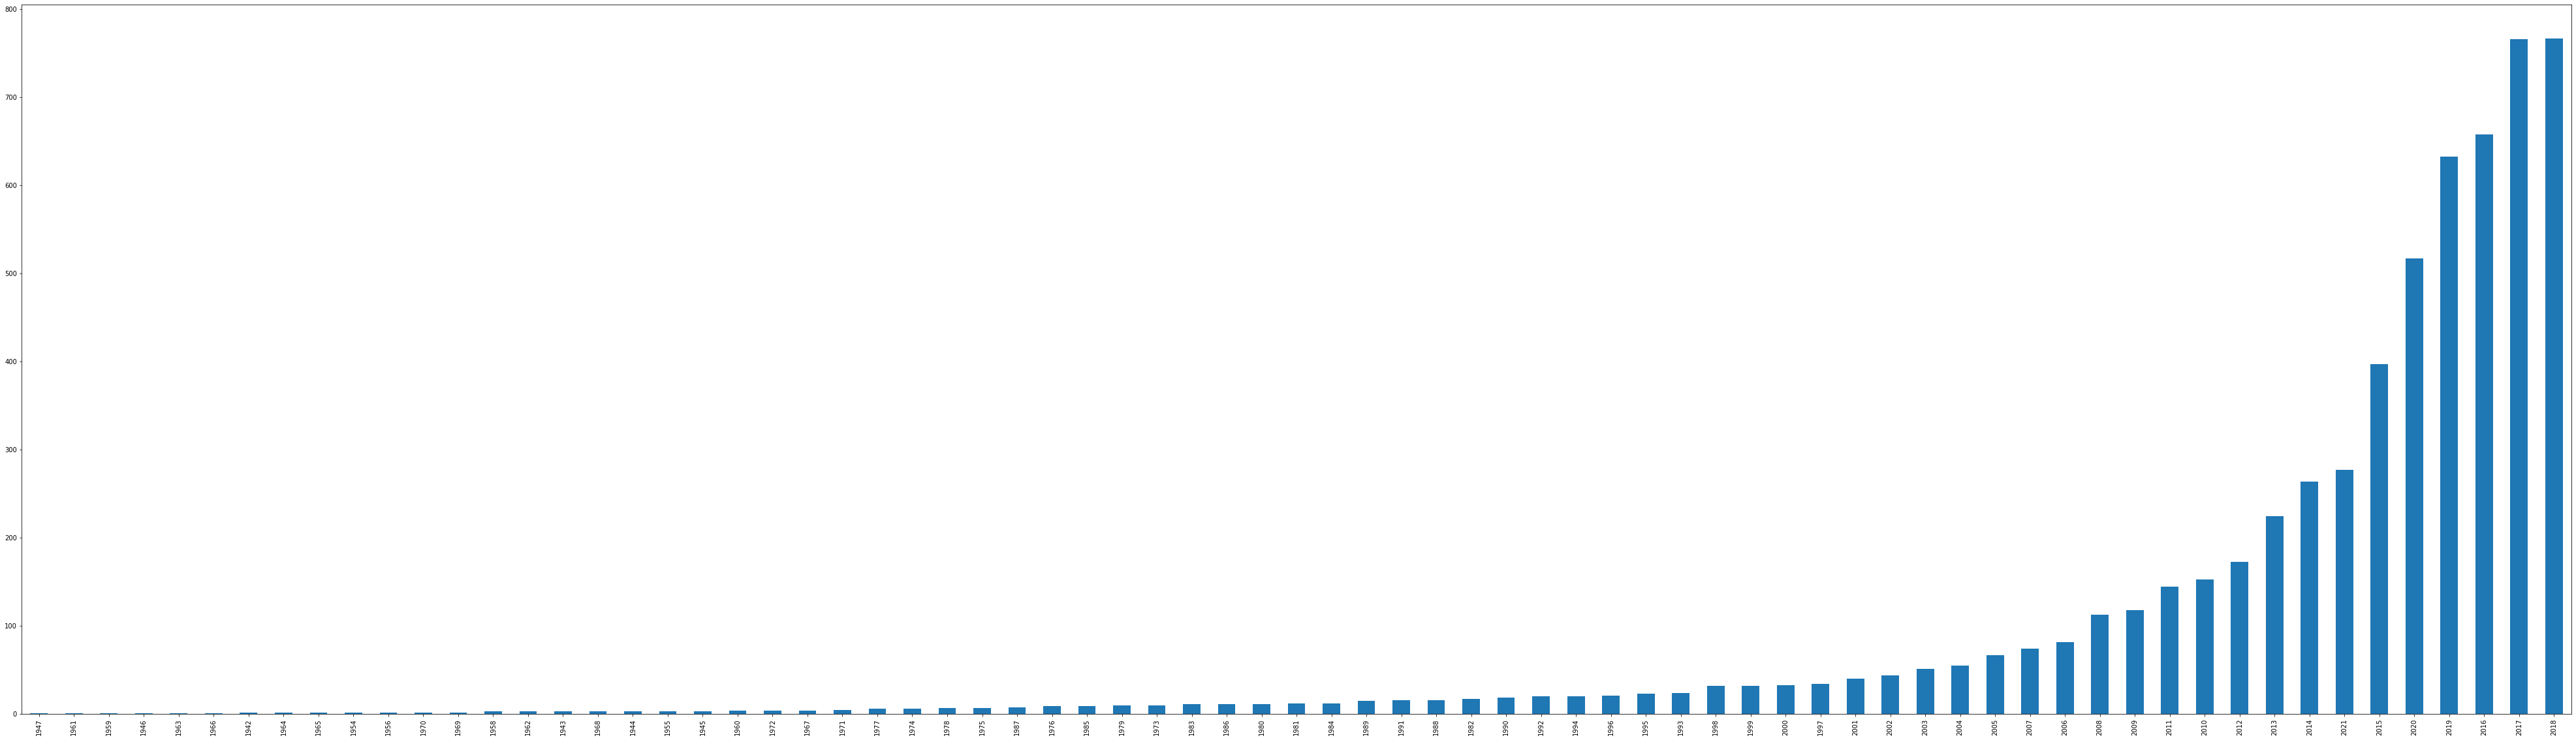

In [ ]:
df_movie[['release_year']].release_year.value_counts(ascending=True).plot(kind='bar',figsize=(70,20))
#we can see that the number of movies per year has increased over the years due to advancement in technology and increase in purchasing power of people
#thus this trend will continue to grow unless something unfortunate happens eg global pandemic,global economic slowdown,cyber attack etc

Unnesting the df for listed_in,cast,country and director

In [ ]:
col1 = df_movie['director'].apply(lambda x:str(x).split(',')).tolist()
dfm1 = pd.DataFrame(col1,index=df_movie['title'])
dfm1 = dfm1.stack()
dfm1 = pd.DataFrame(dfm1.reset_index())
dfm1.rename(columns={0:'director'},inplace=True)
dfm1.drop(columns='level_1',inplace=True)
dfm1.head()
#gives title of movie and names of all directors who directed a particular movie

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,My Little Pony: A New Generation,Robert Cullen
2,My Little Pony: A New Generation,José Luis Ucha
3,Sankofa,Haile Gerima
4,The Starling,Theodore Melfi


In [ ]:
dfm1['director'].value_counts()

nan                188
Rajiv Chilaka       22
Raúl Campos         18
 Jan Suter          18
Suhas Kadav         16
                  ... 
Jumpei Mizusaki      1
 Koji Morimoto       1
 Michael Arias       1
 Arthell Isom        1
Mozez Singh          1
Name: director, Length: 4886, dtype: int64

In [ ]:
col2 = df_movie['cast'].apply(lambda x:str(x).split(',')).tolist()
col2
dfm2 = pd.DataFrame(col2,index=df_movie['title'])
dfm2 = dfm2.stack()
dfm2 = pd.DataFrame(dfm2.reset_index())
dfm2.rename(columns={0:'actor'},inplace=True)
dfm2.drop(columns='level_1',inplace=True)
dfm2.head(15)
#gives title of movie and names of all actors who acted in a particular movie

,title,actor
0,Dick Johnson Is Dead,nan
1,My Little Pony: A New Generation,Vanessa Hudgens
2,My Little Pony: A New Generation,Kimiko Glenn
3,My Little Pony: A New Generation,James Marsden
4,My Little Pony: A New Generation,Sofia Carson
5,My Little Pony: A New Generation,Liza Koshy
6,My Little Pony: A New Generation,Ken Jeong
7,My Little Pony: A New Generation,Elizabeth Perkins
8,My Little Pony: A New Generation,Jane Krakowski
9,My Little Pony: A New Generation,Michael McKean


In [ ]:
dfm2.info()#has total of 44946 actors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44947 entries, 0 to 44946
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   44947 non-null  object
 1   actor   44947 non-null  object
dtypes: object(2)
memory usage: 702.4+ KB


In [ ]:
col3 = df_movie['listed_in'].apply(lambda x:str(x).split(',')).tolist()
dfm3 = pd.DataFrame(col3,index=df_movie['title'])
dfm3 = dfm3.stack()#transpose
dfm3 = pd.DataFrame(dfm3.reset_index())
dfm3.rename(columns={0:'listed_in'},inplace=True)
dfm3.drop(columns='level_1',inplace=True)
dfm3.head()
#gives title of movie and their genres

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,My Little Pony: A New Generation,Children & Family Movies
2,Sankofa,Dramas
3,Sankofa,Independent Movies
4,Sankofa,International Movies


In [ ]:
#these are the different genres of the movies in the dataframe
dfm3['listed_in'].value_counts()

 International Movies        2624
Dramas                       1600
Comedies                     1210
Action & Adventure            859
Documentaries                 829
 Dramas                       827
 Independent Movies           736
 Romantic Movies              613
Children & Family Movies      605
 Thrillers                    512
 Comedies                     464
 Music & Musicals             357
Stand-Up Comedy               334
Horror Movies                 275
 Sci-Fi & Fantasy             230
 Sports Movies                218
International Movies          128
 LGBTQ Movies                 101
 Horror Movies                 82
Classic Movies                 80
 Faith & Spirituality          65
Thrillers                      65
 Cult Movies                   59
Movies                         54
 Anime Features                50
 Documentaries                 40
 Children & Family Movies      36
 Classic Movies                36
Anime Features                 21
Independent Mo

In [ ]:
col4 = df_movie['country'].apply(lambda x:str(x).split(',')).tolist()
dfm4 = pd.DataFrame(col4,index=df_movie['title'])
dfm4 = dfm4.stack()#transpose
dfm4 = pd.DataFrame(dfm4.reset_index())
dfm4.rename(columns={0:'country'},inplace=True)
dfm4.drop(columns='level_1',inplace=True)
dfm4.head()
#gives title of movie and the country where it was produced

,title,country
0,Dick Johnson Is Dead,United States
1,My Little Pony: A New Generation,nan
2,Sankofa,United States
3,Sankofa,Ghana
4,Sankofa,Burkina Faso


In [ ]:
dfm4['country'].value_counts()

United States     2361
India              927
nan                440
 United States     388
United Kingdom     382
                  ... 
 Bermuda             1
 Ecuador             1
Iran                 1
 Armenia             1
 Montenegro          1
Name: country, Length: 188, dtype: int64

In [ ]:
df_movie['country'].value_counts()#if you look at this, US count is less than previous as we had not split the countries individually

United States                            2055
India                                     893
United Kingdom                            206
Canada                                    122
Spain                                      97
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: country, Length: 651, dtype: int64

In [ ]:
#merging all the above dataframes based on common column ie title
dfm5 = dfm2.merge(dfm1,on=['title'],how='inner')#director&actor
dfm6 = dfm5.merge(dfm3,on=['title'],how='inner')#above_with_listed_in
dfm7 = dfm6.merge(dfm4,on=['title'],how='inner')#above_with_country
dfm7['actor'].replace(['nan'],['Unknown actor'],inplace=True)
dfm7['director'].replace(['nan'],['Unknown director'],inplace=True)
dfm7['country'].replace(['nan'],['NA'],inplace=True)
dfm7.head()

,title,actor,director,listed_in,country
0,Dick Johnson Is Dead,Unknown actor,Kirsten Johnson,Documentaries,United States
1,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,Children & Family Movies,NA
2,My Little Pony: A New Generation,Vanessa Hudgens,José Luis Ucha,Children & Family Movies,NA
3,My Little Pony: A New Generation,Kimiko Glenn,Robert Cullen,Children & Family Movies,NA
4,My Little Pony: A New Generation,Kimiko Glenn,José Luis Ucha,Children & Family Movies,NA


In [ ]:
df_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm..."
2,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
4,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104.0,"Comedies, Dramas",A woman adjusting to life after a loss contend...
5,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127.0,"Dramas, International Movies",After most of her family is murdered in a terr...


In [ ]:
#merging this new df with original df_movie dataframe
df_movie_final = dfm7.merge(df_movie[['show_id','title','date_added','release_year','rating','duration','description']],on=['title'],how='left')
df_movie_final.head(5)

,title,actor,director,listed_in,country,show_id,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Unknown actor,Kirsten Johnson,Documentaries,United States,s1,"September 25, 2021",2020,PG-13,90.0,"As her father nears the end of his life, filmm..."
1,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,Children & Family Movies,NA,s7,"September 24, 2021",2021,PG,91.0,Equestria's divided. But a bright-eyed hero be...
2,My Little Pony: A New Generation,Vanessa Hudgens,José Luis Ucha,Children & Family Movies,NA,s7,"September 24, 2021",2021,PG,91.0,Equestria's divided. But a bright-eyed hero be...
3,My Little Pony: A New Generation,Kimiko Glenn,Robert Cullen,Children & Family Movies,NA,s7,"September 24, 2021",2021,PG,91.0,Equestria's divided. But a bright-eyed hero be...
4,My Little Pony: A New Generation,Kimiko Glenn,José Luis Ucha,Children & Family Movies,NA,s7,"September 24, 2021",2021,PG,91.0,Equestria's divided. But a bright-eyed hero be...


In [ ]:
#checking for nulls now
df_movie_final.isnull().sum()

title           0
actor           0
director        0
listed_in       0
country         0
show_id         0
date_added      0
release_year    0
rating          9
duration        0
description     0
dtype: int64

In [ ]:
df_movie_final[df_movie_final['rating'].isna()]

,title,actor,director,listed_in,country,show_id,date_added,release_year,rating,duration,description
88271,13TH: A Conversation with Oprah Winfrey & Ava ...,Oprah Winfrey,Unknown director,Movies,NA,s5990,"January 26, 2017",2017,NaN,37.0,Oprah Winfrey sits down with director Ava DuVe...
88272,13TH: A Conversation with Oprah Winfrey & Ava ...,Ava DuVernay,Unknown director,Movies,NA,s5990,"January 26, 2017",2017,NaN,37.0,Oprah Winfrey sits down with director Ava DuVe...
119939,My Honor Was Loyalty,Leone Frisa,Alessandro Pepe,Dramas,Italy,s7538,"March 1, 2017",2015,NaN,115.0,"Amid the chaos and horror of World War II, a c..."
119940,My Honor Was Loyalty,Paolo Vaccarino,Alessandro Pepe,Dramas,Italy,s7538,"March 1, 2017",2015,NaN,115.0,"Amid the chaos and horror of World War II, a c..."
119941,My Honor Was Loyalty,Francesco Migliore,Alessandro Pepe,Dramas,Italy,s7538,"March 1, 2017",2015,NaN,115.0,"Amid the chaos and horror of World War II, a c..."
119942,My Honor Was Loyalty,Albrecht Weimer,Alessandro Pepe,Dramas,Italy,s7538,"March 1, 2017",2015,NaN,115.0,"Amid the chaos and horror of World War II, a c..."
119943,My Honor Was Loyalty,Giulia Dichiaro,Alessandro Pepe,Dramas,Italy,s7538,"March 1, 2017",2015,NaN,115.0,"Amid the chaos and horror of World War II, a c..."
119944,My Honor Was Loyalty,Alessandra Oriti Niosi,Alessandro Pepe,Dramas,Italy,s7538,"March 1, 2017",2015,NaN,115.0,"Amid the chaos and horror of World War II, a c..."
119945,My Honor Was Loyalty,Andreas Segeritz,Alessandro Pepe,Dramas,Italy,s7538,"March 1, 2017",2015,NaN,115.0,"Amid the chaos and horror of World War II, a c..."


In [ ]:
df_movie_final['rating'].fillna('NR',inplace=True)

In [ ]:
df_movie_final.isnull().sum()


title           0
actor           0
director        0
listed_in       0
country         0
show_id         0
date_added      0
release_year    0
rating          0
duration        0
description     0
dtype: int64

In [ ]:
df_movie_final.head(25)

,title,actor,director,listed_in,country,show_id,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Unknown actor,Kirsten Johnson,Documentaries,United States,s1,"September 25, 2021",2020,PG-13,90.0,"As her father nears the end of his life, filmm..."
1,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,Children & Family Movies,NA,s7,"September 24, 2021",2021,PG,91.0,Equestria's divided. But a bright-eyed hero be...
2,My Little Pony: A New Generation,Vanessa Hudgens,José Luis Ucha,Children & Family Movies,NA,s7,"September 24, 2021",2021,PG,91.0,Equestria's divided. But a bright-eyed hero be...
3,My Little Pony: A New Generation,Kimiko Glenn,Robert Cullen,Children & Family Movies,NA,s7,"September 24, 2021",2021,PG,91.0,Equestria's divided. But a bright-eyed hero be...
4,My Little Pony: A New Generation,Kimiko Glenn,José Luis Ucha,Children & Family Movies,NA,s7,"September 24, 2021",2021,PG,91.0,Equestria's divided. But a bright-eyed hero be...
5,My Little Pony: A New Generation,James Marsden,Robert Cullen,Children & Family Movies,NA,s7,"September 24, 2021",2021,PG,91.0,Equestria's divided. But a bright-eyed hero be...
6,My Little Pony: A New Generation,James Marsden,José Luis Ucha,Children & Family Movies,NA,s7,"September 24, 2021",2021,PG,91.0,Equestria's divided. But a bright-eyed hero be...
7,My Little Pony: A New Generation,Sofia Carson,Robert Cullen,Children & Family Movies,NA,s7,"September 24, 2021",2021,PG,91.0,Equestria's divided. But a bright-eyed hero be...
8,My Little Pony: A New Generation,Sofia Carson,José Luis Ucha,Children & Family Movies,NA,s7,"September 24, 2021",2021,PG,91.0,Equestria's divided. But a bright-eyed hero be...
9,My Little Pony: A New Generation,Liza Koshy,Robert Cullen,Children & Family Movies,NA,s7,"September 24, 2021",2021,PG,91.0,Equestria's divided. But a bright-eyed hero be...


In [ ]:
df_movie_final['duration'].value_counts()
#this gives incorrect result as we have manipulated df,see below for actual duration of movies

94.0     4343
106.0    4040
97.0     3624
95.0     3560
96.0     3511
         ... 
20.0        4
5.0         3
9.0         2
8.0         2
11.0        2
Name: duration, Length: 205, dtype: int64

In [ ]:
df_movie['duration'].value_counts()
#using this to find number of movies ordered by their screentime in desc order

90.0     152
94.0     146
93.0     146
97.0     146
91.0     144
        ... 
212.0      1
8.0        1
186.0      1
193.0      1
191.0      1
Name: duration, Length: 205, dtype: int64

In [ ]:
df_movie['duration'].describe()

count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

In [ ]:
df_movie_final['title'] = df_movie_final['title'].str.replace(r"\(.*\)","")
df_movie_final.head()

<ipython-input-390-262eecdcc2c6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_movie_final['title'] = df_movie_final['title'].str.replace(r"\(.*\)","")


,title,actor,director,listed_in,country,show_id,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Unknown actor,Kirsten Johnson,Documentaries,United States,s1,"September 25, 2021",2020,PG-13,90.0,"As her father nears the end of his life, filmm..."
1,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,Children & Family Movies,NA,s7,"September 24, 2021",2021,PG,91.0,Equestria's divided. But a bright-eyed hero be...
2,My Little Pony: A New Generation,Vanessa Hudgens,José Luis Ucha,Children & Family Movies,NA,s7,"September 24, 2021",2021,PG,91.0,Equestria's divided. But a bright-eyed hero be...
3,My Little Pony: A New Generation,Kimiko Glenn,Robert Cullen,Children & Family Movies,NA,s7,"September 24, 2021",2021,PG,91.0,Equestria's divided. But a bright-eyed hero be...
4,My Little Pony: A New Generation,Kimiko Glenn,José Luis Ucha,Children & Family Movies,NA,s7,"September 24, 2021",2021,PG,91.0,Equestria's divided. But a bright-eyed hero be...


Univariate Analysis on counts of each column

---



In [ ]:
df_movie_final['listed_in'].value_counts

<bound method IndexOpsMixin.value_counts of 0                    Documentaries
1         Children & Family Movies
2         Children & Family Movies
3         Children & Family Movies
4         Children & Family Movies
                    ...           
145909        International Movies
145910            Music & Musicals
145911                      Dramas
145912        International Movies
145913            Music & Musicals
Name: listed_in, Length: 145914, dtype: object>

In [ ]:
df_movie_final.groupby(['listed_in']).agg({"title":"nunique"})

,title
listed_in,
Anime Features,50
Children & Family Movies,36
Classic Movies,36
Comedies,464
Cult Movies,59
Documentaries,40
Dramas,822
Faith & Spirituality,65
Horror Movies,82


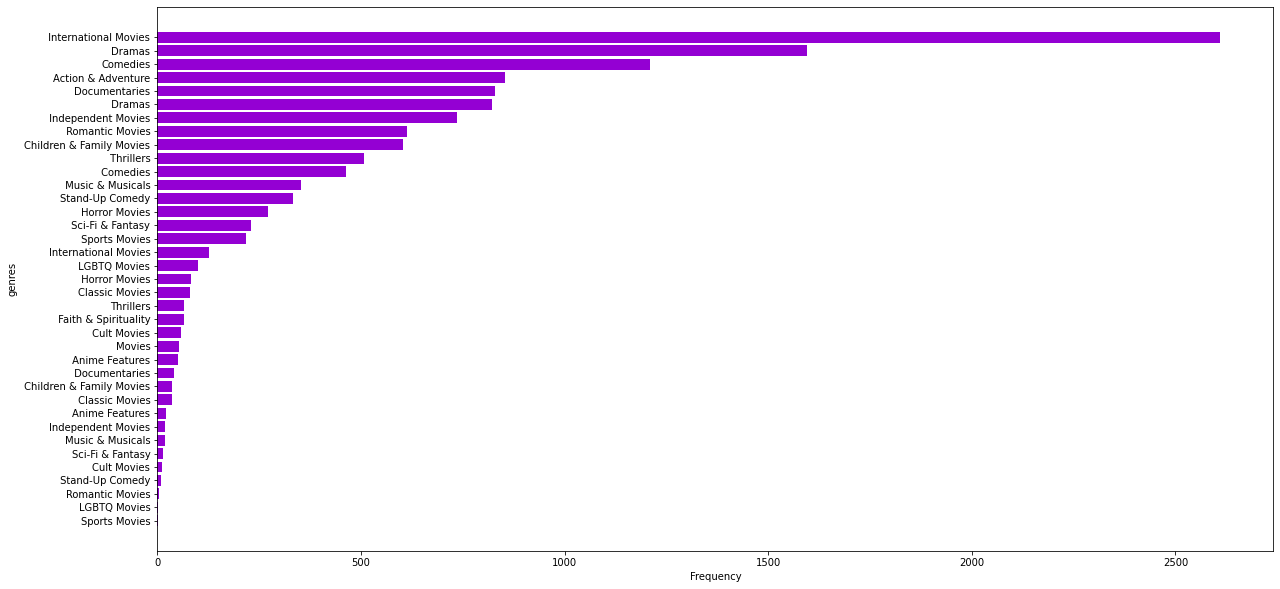

In [ ]:
df_genre = df_movie_final.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
plt.figure(figsize=(20,10))
plt.barh(df_genre[::-1]['listed_in'],df_genre[::-1]['title'],color=['darkviolet'])
plt.xlabel('Frequency')
plt.ylabel('genres')
plt.show()

We can see that international movies are very popular, hence investing more in these types of movies can yield better profit via increase in userbase

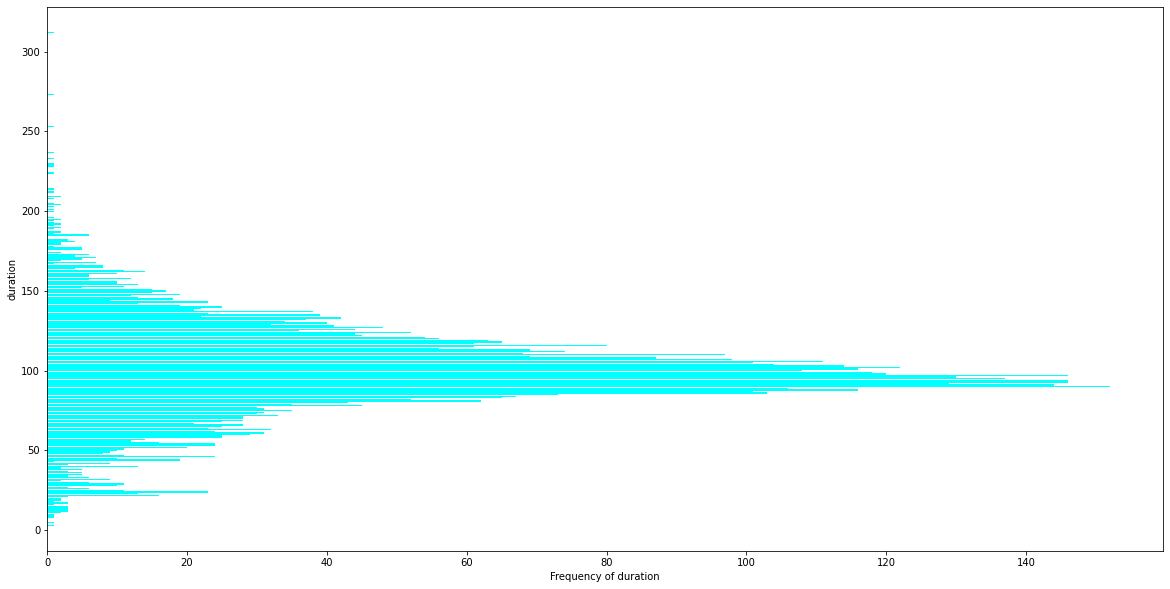

In [ ]:
df_movie_duration = df_movie.groupby(['duration']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
plt.figure(figsize=(20,10))
plt.barh(df_movie_duration[::-1]['duration'],df_movie_duration[::-1]['title'],color=['cyan'])
plt.xlabel('Frequency of duration')
plt.ylabel('duration')
plt.show()

Most of the movies are in the range 80-100 min and hence it can be said that the average length of the movie is somewhere around this range

In [ ]:
df_international_movies_by_countries = df_movie_final.loc[df_movie_final['listed_in']=='International Movies']
df_international_movies_by_countries = df_international_movies_by_countries[['listed_in','country']]
df_international_movies_by_countries.head(40)

,listed_in,country
1278,International Movies,NA
1280,International Movies,NA
1282,International Movies,NA
1284,International Movies,NA
1286,International Movies,NA
1288,International Movies,NA
1290,International Movies,NA
1292,International Movies,NA
4345,International Movies,NA
4347,International Movies,NA


In [ ]:
df_international_movies_by_countries.drop(df_international_movies_by_countries.loc[df_international_movies_by_countries['country']=='NA'].index, inplace=True)
df_international_movies_by_countries.reset_index(drop=True,inplace=True)
df_international_movies_by_countries.value_counts()

listed_in             country             
International Movies  India                   291
                      Spain                   113
                      Philippines              83
                       United States           48
                      South Korea              44
                       Germany                 35
                      China                    35
                      Bulgaria                 25
                      United Arab Emirates     24
                      Australia                21
                      United Kingdom           18
                      Germany                  17
                       Belgium                 16
                      Thailand                 14
                      Canada                   13
                       Italy                   12
                      France                   12
                      Nigeria                  12
                      Japan                    11
       

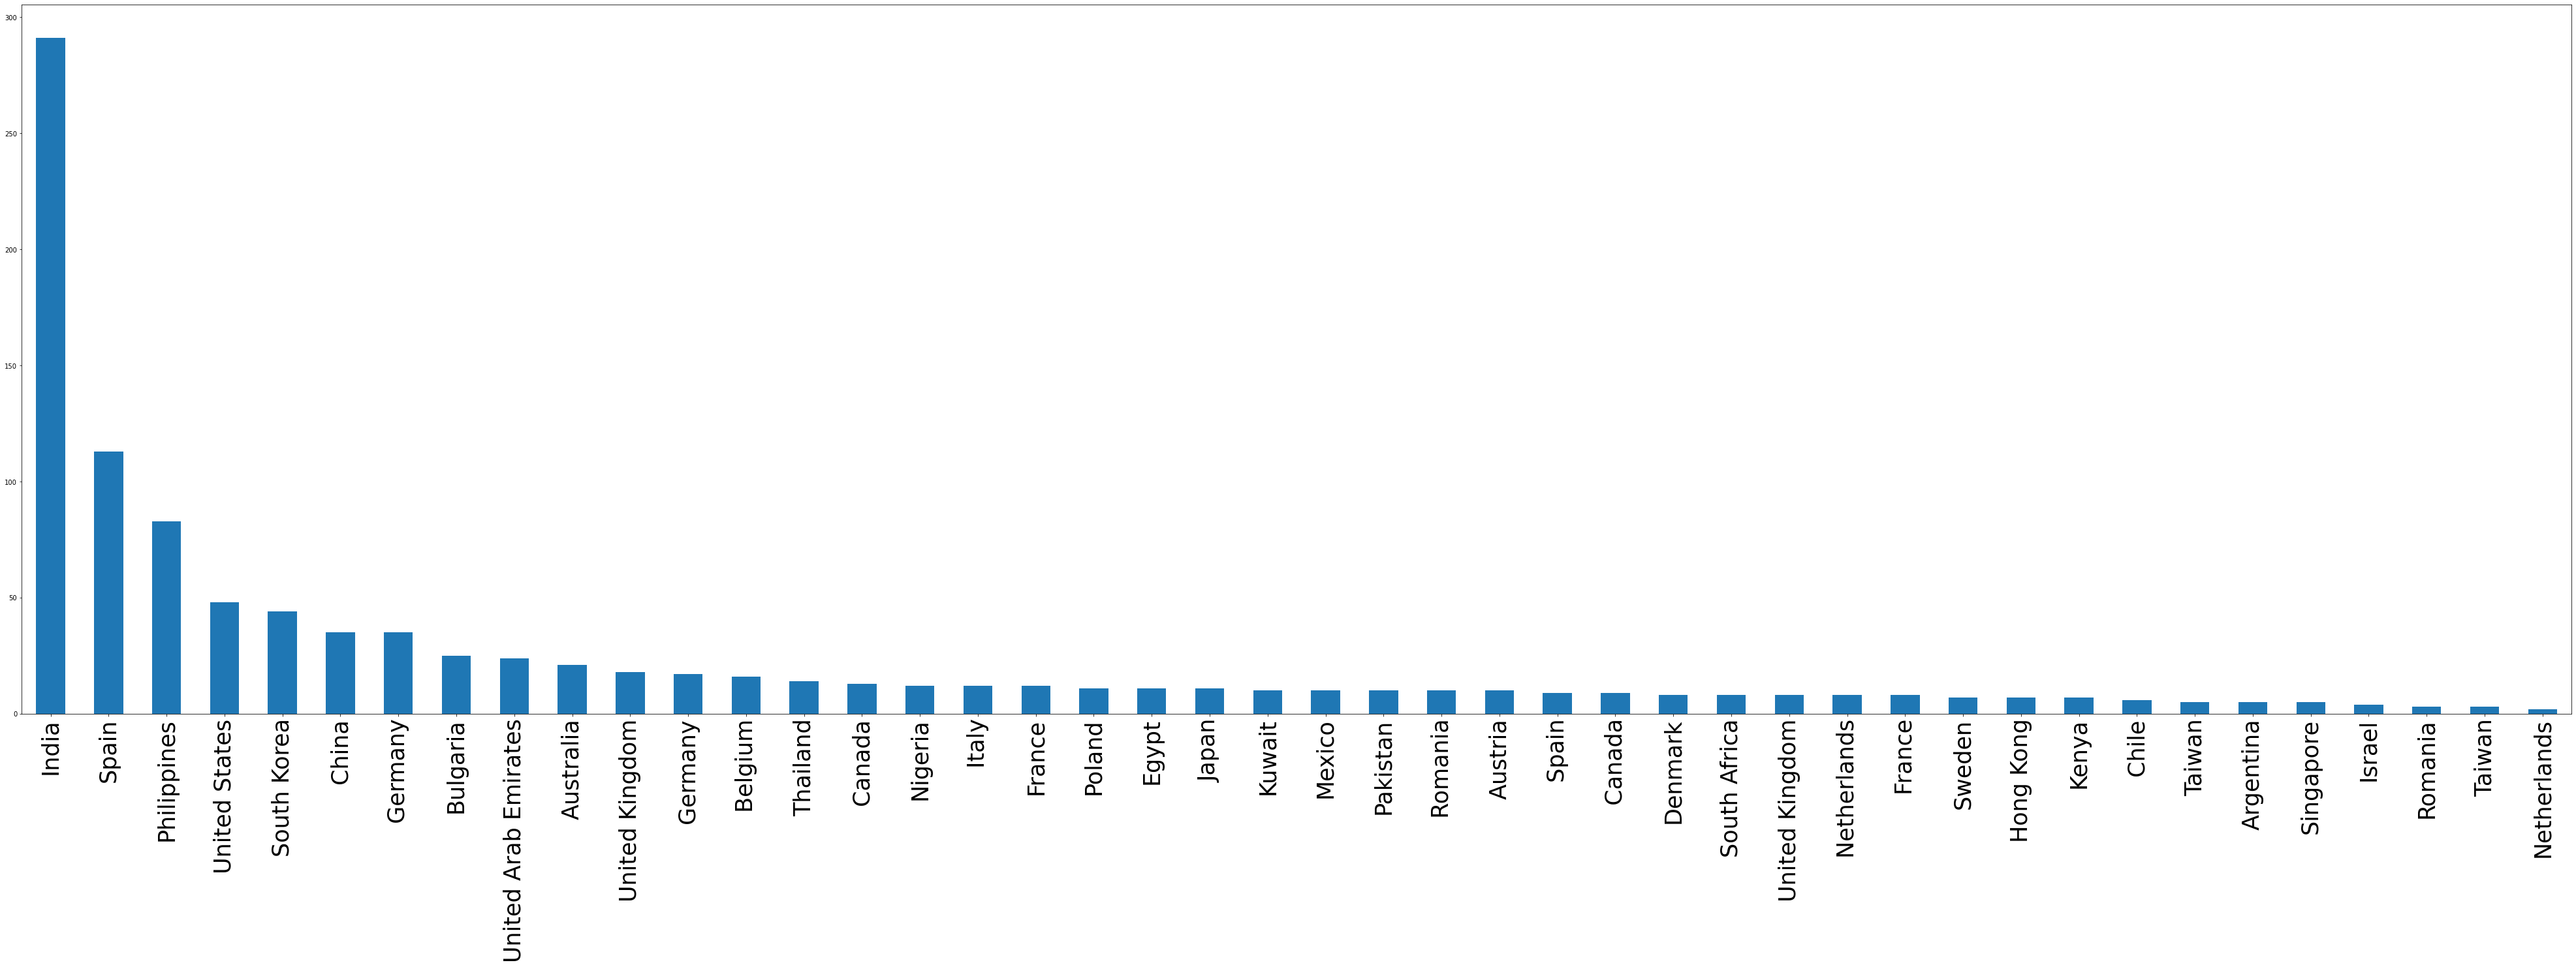

In [ ]:
df_international_movies_by_countries.country.value_counts().plot(kind='bar',figsize=(70,20))
xlabel='country'
ylabel= 'count of movies'
plt.xticks(fontsize=35)
plt.show()
#this shows that international movies are more popular in India followed by Spain and then Phillipines
#might be due to the reason that most international movies are in English and a huge population of India can understand English

Similarly other sort of analysis can also be done

In [ ]:
#number of distinct titles based on the basis of the country
df_22= df_movie_final.groupby(['country']).agg({'title':'nunique'})
df_22.tail(35)

,title
country,
Netherlands,23
New Zealand,15
Nigeria,87
Norway,12
Pakistan,18
Paraguay,1
Peru,6
Philippines,77
Poland,22


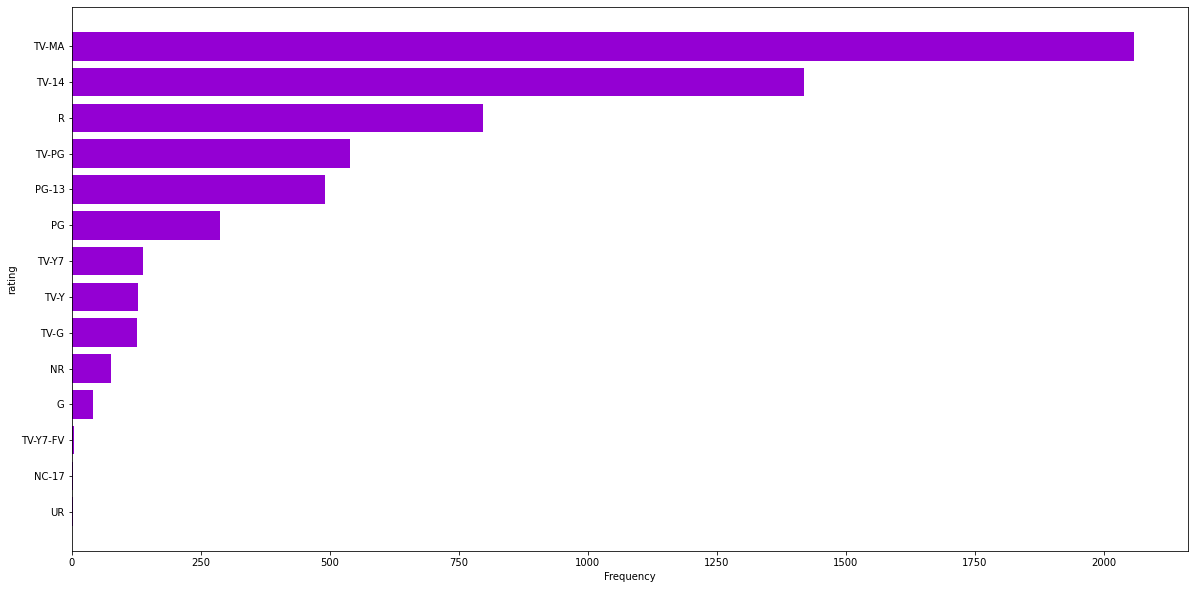

In [ ]:
df_rating = df_movie_final.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
plt.figure(figsize=(20,10))
plt.barh(df_rating[::-1]['rating'],df_rating[::-1]['title'],color=['darkviolet'])
plt.xlabel('Frequency')
plt.ylabel('rating')
plt.show()
#TV-MA movies are most popular followed by TV-14
#these are the most viewed rating category

In [ ]:
df_rating.value_counts()

rating    title
G         41       1
NC-17     3        1
NR        77       1
PG        287      1
PG-13     490      1
R         797      1
TV-14     1418     1
TV-G      126      1
TV-MA     2059     1
TV-PG     540      1
TV-Y      129      1
TV-Y7     139      1
TV-Y7-FV  5        1
UR        3        1
dtype: int64

In [ ]:
#number of distinct titles based on the actors
df_movie_actor = df_movie_final.groupby(['actor']).agg({'title':'nunique'})
df_movie_actor

,title
actor,
Jr.,1
"""Riley"" Lakdhar Dridi",1
'Najite Dede,1
2Mex,1
50 Cent,4
...,...
Çetin Tekindor,1
Úrsula Corberó,1
İbrahim Büyükak,1


In [ ]:
#renaming row from df having actor name as Joey Bada$$ as it was throwing an error
df_movie_final['actor'].replace({'Joey Bada$$':'Joey Badass'},inplace=True)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0, flags=flags)


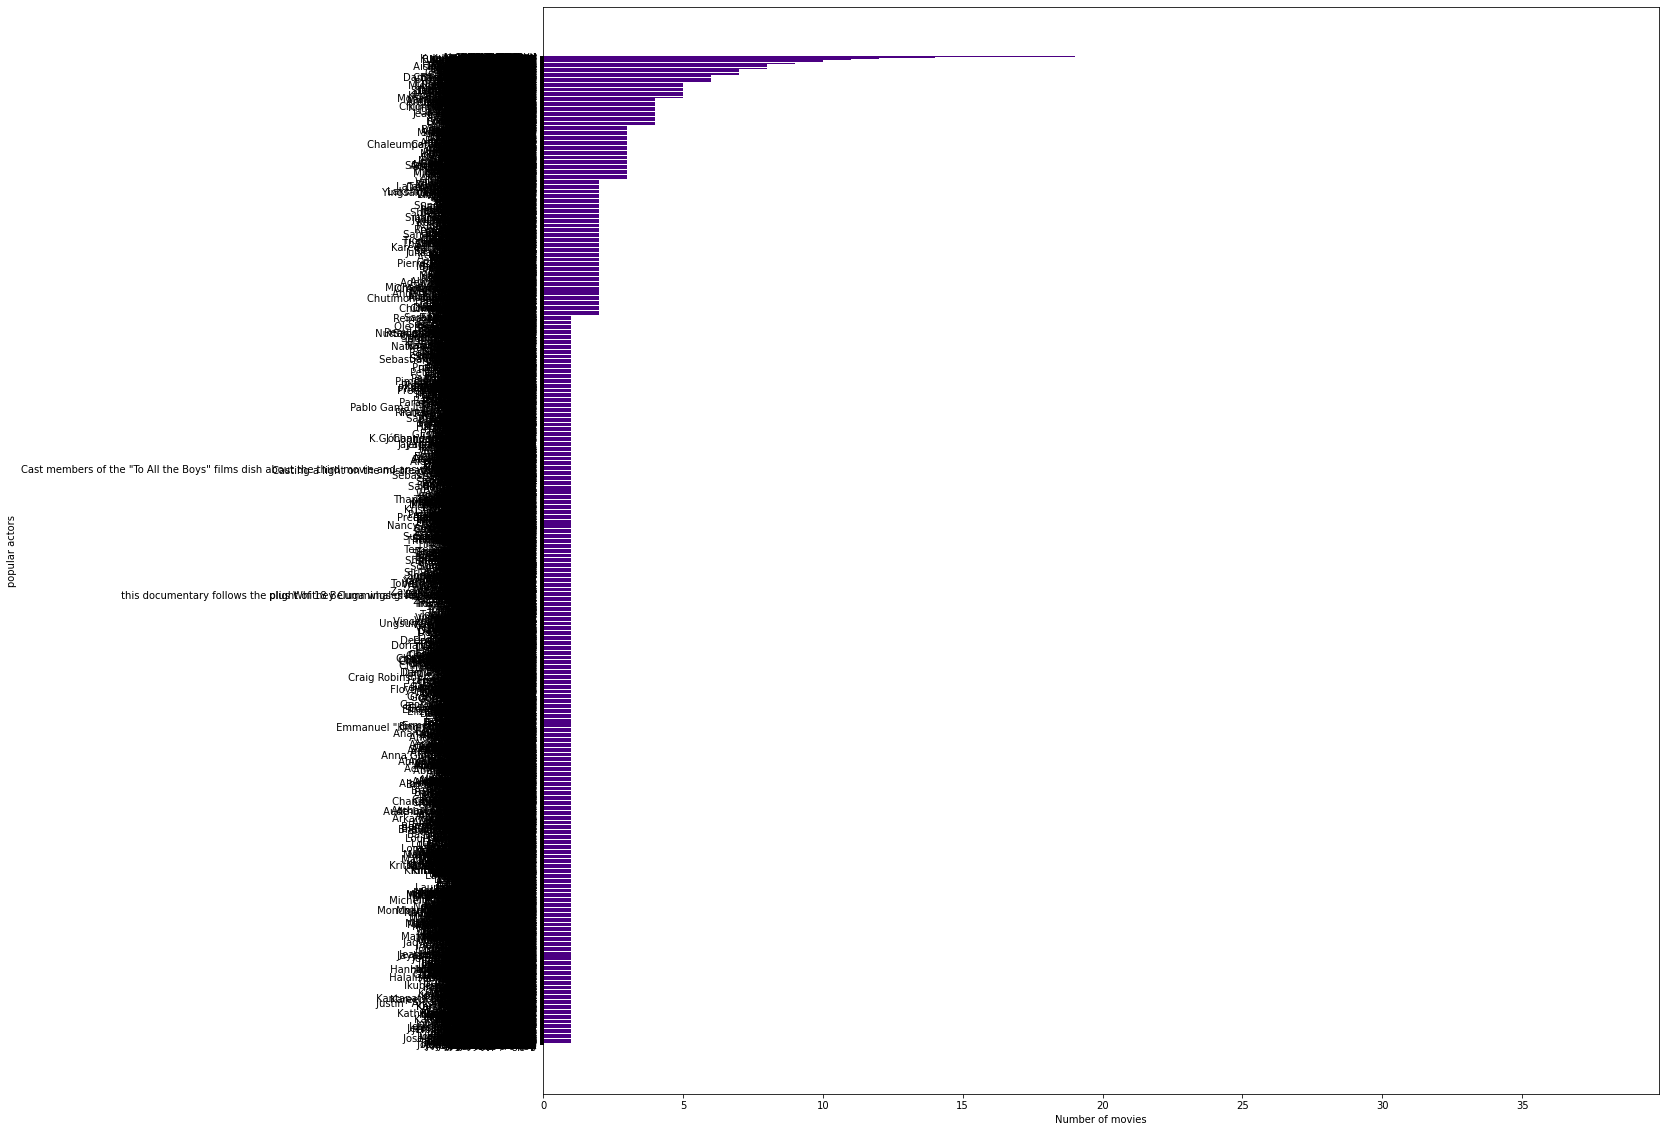

In [ ]:
df_actor_count = df_movie_final.groupby(['actor']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
df_actor_count = df_actor_count[df_actor_count['actor']!='Unknown actor']
plt.figure(figsize=(20,20))
plt.barh(df_actor_count[::-1]['actor'],df_actor_count[::-1]['title'],color=['indigo'])
plt.xlabel('Number of movies')
plt.ylabel('popular actors')
plt.show()

In [ ]:
df_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm..."
2,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
4,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104.0,"Comedies, Dramas",A woman adjusting to life after a loss contend...
5,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127.0,"Dramas, International Movies",After most of her family is murdered in a terr...


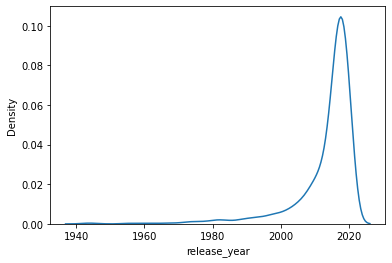

In [ ]:
sns.kdeplot(df_movie['release_year'])

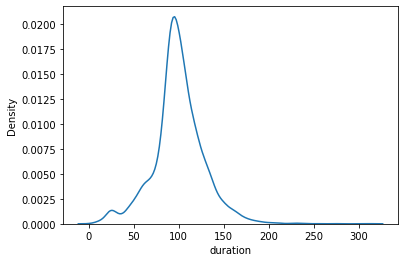

In [ ]:
sns.kdeplot(df_movie['duration'])


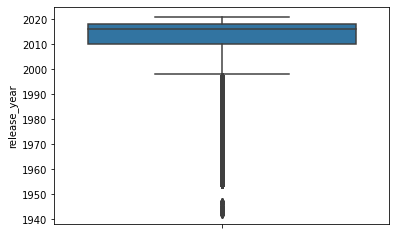

In [ ]:
sns.boxplot(y=df_movie_final['release_year'])

In [ ]:
df_with_year = df_movie
df_with_year['year'] = pd.DatetimeIndex(df_with_year['date_added']).year
df_with_year.head()

<ipython-input-408-9cc435af5224>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_year['year'] = pd.DatetimeIndex(df_with_year['date_added']).year


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",2021
2,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021
4,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104.0,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021
5,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127.0,"Dramas, International Movies",After most of her family is murdered in a terr...,2021


In [ ]:
df_with_year_month = df_with_year
df_with_year_month['month'] = pd.DatetimeIndex(df_with_year_month['date_added']).month
df_with_year_month.head()

<ipython-input-409-28e87254e534>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_year_month['month'] = pd.DatetimeIndex(df_with_year_month['date_added']).month


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",2021,9
2,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9
4,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104.0,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9
5,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127.0,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9


In [ ]:
df_movie_US = df_movie_final.loc[df_movie_final['country']=='United States']
df_movie_US.head()

,title,actor,director,listed_in,country,show_id,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Unknown actor,Kirsten Johnson,Documentaries,United States,s1,"September 25, 2021",2020,PG-13,90.0,"As her father nears the end of his life, filmm..."
21,Sankofa,Kofi Ghanaba,Haile Gerima,Dramas,United States,s8,"September 24, 2021",1993,TV-MA,125.0,"On a photo shoot in Ghana, an American model s..."
27,Sankofa,Kofi Ghanaba,Haile Gerima,Independent Movies,United States,s8,"September 24, 2021",1993,TV-MA,125.0,"On a photo shoot in Ghana, an American model s..."
33,Sankofa,Kofi Ghanaba,Haile Gerima,International Movies,United States,s8,"September 24, 2021",1993,TV-MA,125.0,"On a photo shoot in Ghana, an American model s..."
39,Sankofa,Oyafunmike Ogunlano,Haile Gerima,Dramas,United States,s8,"September 24, 2021",1993,TV-MA,125.0,"On a photo shoot in Ghana, an American model s..."


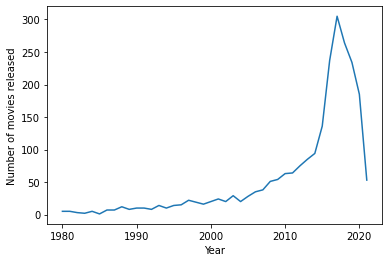

In [ ]:
df_movie_US_release_year = df_movie_US[df_movie_US['release_year']>=1980].groupby(['release_year']).agg({'title':'nunique'}).reset_index()
sns.lineplot(data=df_movie_US_release_year,x='release_year',y='title')
plt.ylabel("Number of movies released")
plt.xlabel("Year")
plt.show()

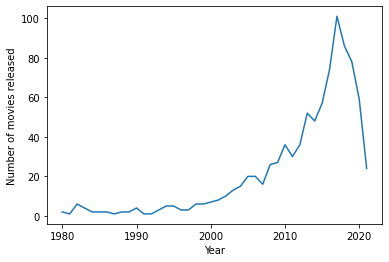

In [ ]:
df_movie_India = df_movie_final.loc[df_movie_final['country']=='India']
df_movie_India_release_year = df_movie_India[df_movie_India['release_year']>=1980].groupby(['release_year']).agg({'title':'nunique'}).reset_index()
sns.lineplot(data=df_movie_India_release_year,x='release_year',y='title')
plt.ylabel("Number of movies released")
plt.xlabel("Year")
plt.show()

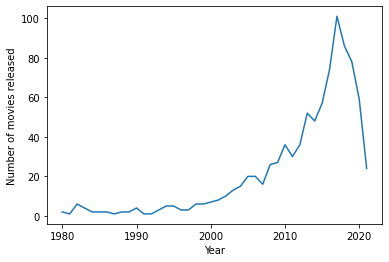

In [ ]:
df_movie_India = df_movie_final.loc[df_movie_final['country']=='India']
df_movie_India_release_year = df_movie_India[df_movie_India['release_year']>=1980].groupby(['release_year']).agg({'title':'nunique'}).reset_index()
sns.lineplot(data=df_movie_India_release_year,x='release_year',y='title')
plt.ylabel("Number of movies released")
plt.xlabel("Year")
plt.show()

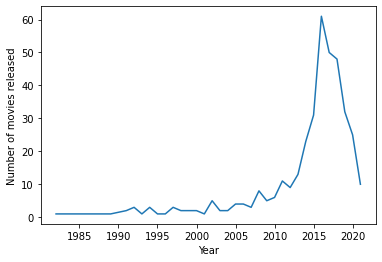

In [ ]:
df_movie_UK = df_movie_final.loc[df_movie_final['country']=='United Kingdom']
df_movie_UK_release_year = df_movie_UK[df_movie_UK['release_year']>=1980].groupby(['release_year']).agg({'title':'nunique'}).reset_index()
sns.lineplot(data=df_movie_UK_release_year,x='release_year',y='title')
plt.ylabel("Number of movies released")
plt.xlabel("Year")
plt.show()

In [ ]:
df_movie_US['release_year'].value_counts()

2017    3996
2018    3617
2016    3033
2019    2902
2020    2457
        ... 
1945      12
1947       8
1942       6
1943       5
1946       2
Name: release_year, Length: 68, dtype: int64

In [ ]:
#Let's do the same analysis for TV shows also
df_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [ ]:
df_show.nunique()

show_id         2676
type               1
title           2676
director         222
cast            2283
country          196
date_added      1051
release_year      46
rating             9
duration          15
listed_in        236
description     2672
dtype: int64

In [ ]:
df_show.isnull().sum()

show_id            0
type               0
title              0
director        2446
cast             350
country          391
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
df_show.dropna(subset=['rating'], how='all', inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df_show.isnull().sum()

show_id            0
type               0
title              0
director        2444
cast             350
country          391
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
df_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [ ]:
df_show['country'].value_counts()

United States                                    760
United Kingdom                                   213
Japan                                            168
South Korea                                      158
India                                             79
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: country, Length: 196, dtype: int64

In [ ]:
df_show['duration'] = df_show['duration'].str.replace("Seasons" ,'')
df_show['duration'] = df_show['duration'].str.replace("Season" ,'')
df_show.head()

<ipython-input-423-f3e793ce3087>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_show['duration'] = df_show['duration'].str.replace("Seasons" ,'')
<ipython-input-423-f3e793ce3087>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_show['duration'] = df_show['duration'].str.replace("Season" ,'')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [ ]:
df_show['date_added'].fillna('NA',inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df_show.head(45)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
7,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
8,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",NaN,"September 23, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."
9,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
10,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...


In [ ]:
df_show['release_year'].value_counts()

2020    436
2019    397
2018    380
2021    315
2017    265
2016    244
2015    161
2014     88
2012     64
2013     62
2010     40
2011     40
2009     34
2008     23
2006     14
2007     14
2005     13
2003     10
2004      9
1999      7
2002      7
2001      5
1993      4
2000      4
1997      4
1998      4
1990      3
1996      3
1992      3
1995      2
1994      2
1988      2
1986      2
1989      1
1967      1
1985      1
1946      1
1981      1
1972      1
1979      1
1977      1
1991      1
1974      1
1925      1
1945      1
1963      1
Name: release_year, dtype: int64

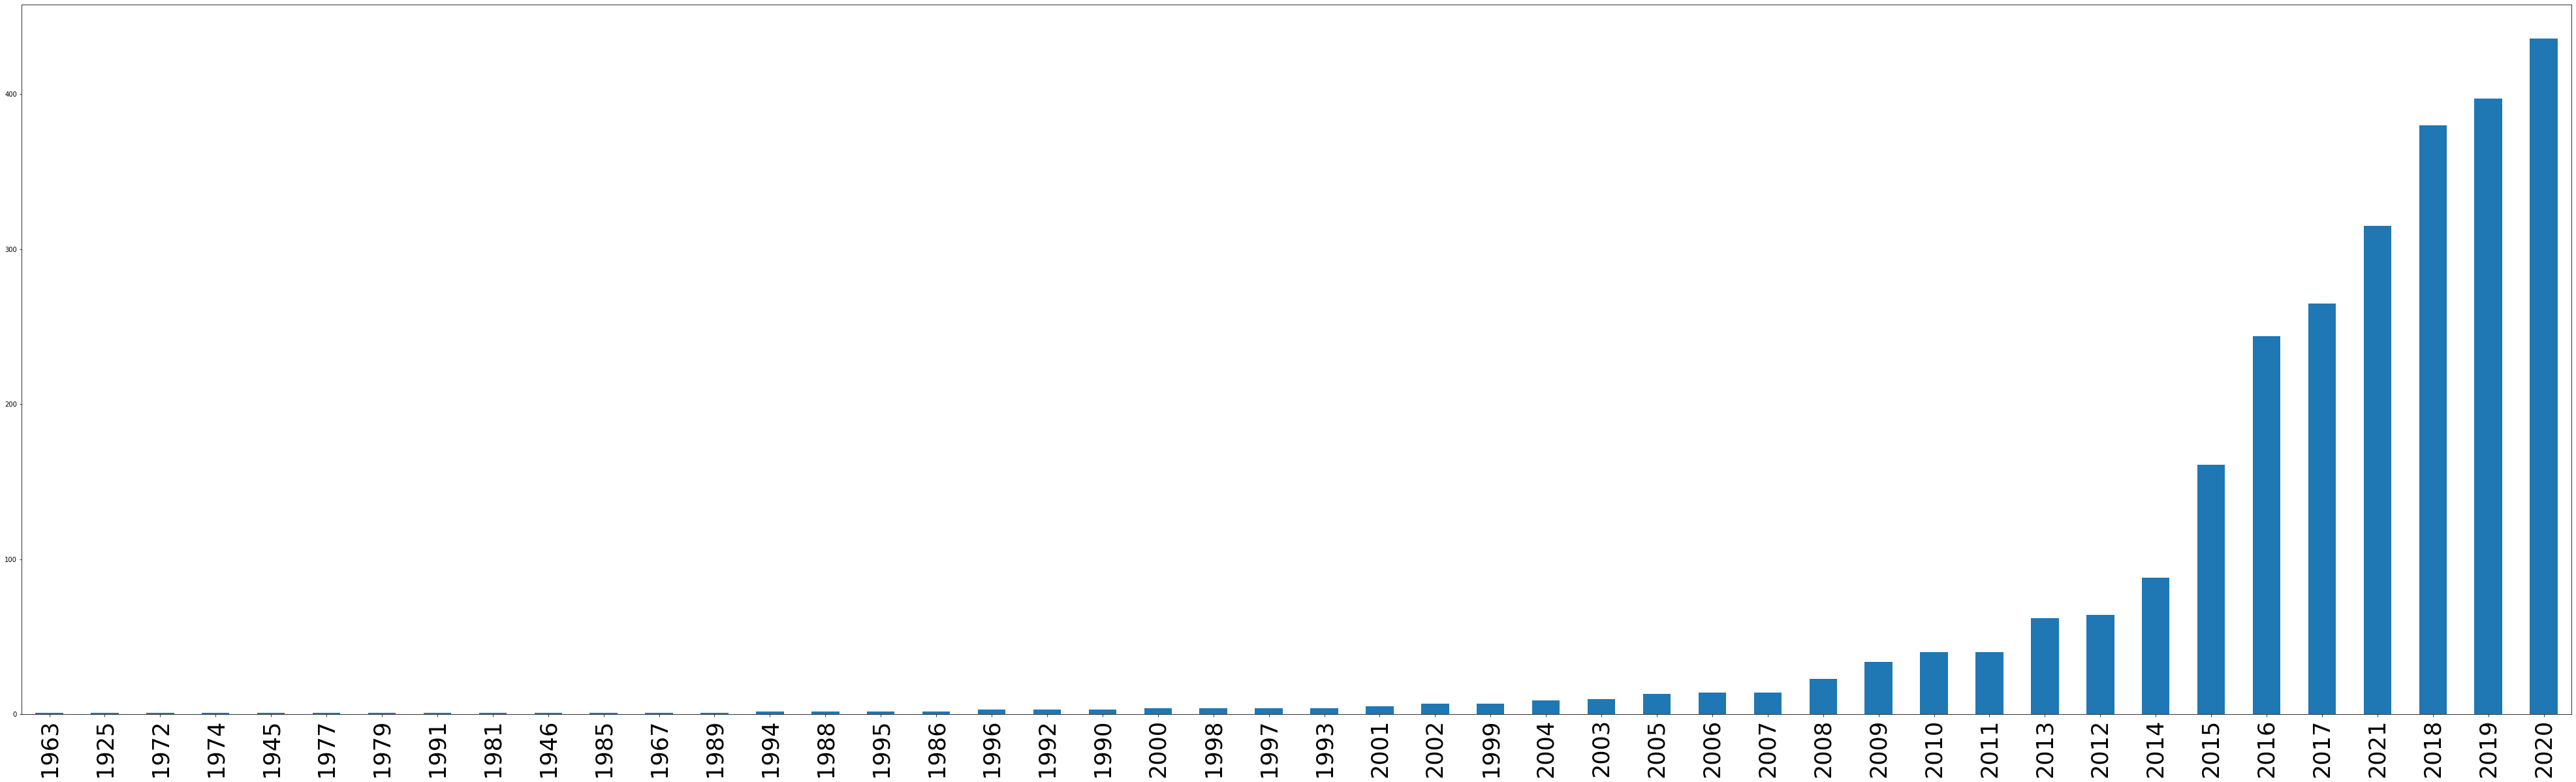

In [ ]:
df_show[['release_year']].release_year.value_counts(ascending=True).plot(kind='bar',figsize=(70,20))
plt.xticks(fontsize=35)
plt.show()
#TV shows have also increased yearwise

Unnesting director,cast,country and listed_in

In [ ]:
cola = df_show['director'].apply(lambda x:str(x).split(',')).tolist()
dfs1 = pd.DataFrame(cola,index=df_show['title'])
dfs1 = dfs1.stack()
dfs1 = pd.DataFrame(dfs1.reset_index())
dfs1.rename(columns={0:'director'},inplace=True)
dfs1.drop(columns='level_1',inplace=True)
dfs1.head()

,title,director
0,Blood & Water,nan
1,Ganglands,Julien Leclercq
2,Jailbirds New Orleans,nan
3,Kota Factory,nan
4,Midnight Mass,Mike Flanagan


In [ ]:
colb = df_show['cast'].apply(lambda x:str(x).split(',')).tolist()
dfs2 = pd.DataFrame(colb,index=df_show['title'])
dfs2 = dfs2.stack()
dfs2 = pd.DataFrame(dfs2.reset_index())
dfs2.rename(columns={0:'actor'},inplace=True)
dfs2.drop(columns='level_1',inplace=True)
dfs2.head()

,title,actor
0,Blood & Water,Ama Qamata
1,Blood & Water,Khosi Ngema
2,Blood & Water,Gail Mabalane
3,Blood & Water,Thabang Molaba
4,Blood & Water,Dillon Windvogel


In [ ]:
colc = df_show['country'].apply(lambda x:str(x).split(',')).tolist()
dfs3 = pd.DataFrame(colc,index=df_show['title'])
dfs3 = dfs3.stack()
dfs3 = pd.DataFrame(dfs3.reset_index())
dfs3.rename(columns={0:'country'},inplace=True)
dfs3.drop(columns='level_1',inplace=True)
dfs3.head()

,title,country
0,Blood & Water,South Africa
1,Ganglands,nan
2,Jailbirds New Orleans,nan
3,Kota Factory,India
4,Midnight Mass,nan


In [ ]:
cold = df_show['listed_in'].apply(lambda x:str(x).split(',')).tolist()
dfs4 = pd.DataFrame(cold,index=df_show['title'])
dfs4 = dfs4.stack()
dfs4 = pd.DataFrame(dfs4.reset_index())
dfs4.rename(columns={0:'listed_in'},inplace=True)
dfs4.drop(columns='level_1',inplace=True)
dfs4.head()

,title,listed_in
0,Blood & Water,International TV Shows
1,Blood & Water,TV Dramas
2,Blood & Water,TV Mysteries
3,Ganglands,Crime TV Shows
4,Ganglands,International TV Shows


In [ ]:
#now we have to merge the above dataframes on the column name title
#merging all the above dataframes based on common column ie title
dfs5 = dfs2.merge(dfs1,on=['title'],how='inner')#director&actor
dfs6 = dfs5.merge(dfs3,on=['title'],how='inner')#above_with_listed_in
dfs7 = dfs6.merge(dfs4,on=['title'],how='inner')#above_with_country
dfs7['actor'].replace(['nan'],['Unknown actor'],inplace=True)
dfs7['director'].replace(['nan'],['Unknown director'],inplace=True)
dfs7['country'].replace(['nan'],['NA'],inplace=True)
dfs7.head()

,title,actor,director,country,listed_in
0,Blood & Water,Ama Qamata,Unknown director,South Africa,International TV Shows
1,Blood & Water,Ama Qamata,Unknown director,South Africa,TV Dramas
2,Blood & Water,Ama Qamata,Unknown director,South Africa,TV Mysteries
3,Blood & Water,Khosi Ngema,Unknown director,South Africa,International TV Shows
4,Blood & Water,Khosi Ngema,Unknown director,South Africa,TV Dramas


In [ ]:
#merging this new df with original df_movie dataframe
df_show_final = dfs7.merge(df_show[['show_id','title','date_added','release_year','rating','duration','description']],on=['title'],how='left')
df_show_final.head(45)

,title,actor,director,country,listed_in,show_id,date_added,release_year,rating,duration,description
0,Blood & Water,Ama Qamata,Unknown director,South Africa,International TV Shows,s2,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t..."
1,Blood & Water,Ama Qamata,Unknown director,South Africa,TV Dramas,s2,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,Unknown director,South Africa,TV Mysteries,s2,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Khosi Ngema,Unknown director,South Africa,International TV Shows,s2,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,Unknown director,South Africa,TV Dramas,s2,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t..."
5,Blood & Water,Khosi Ngema,Unknown director,South Africa,TV Mysteries,s2,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t..."
6,Blood & Water,Gail Mabalane,Unknown director,South Africa,International TV Shows,s2,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t..."
7,Blood & Water,Gail Mabalane,Unknown director,South Africa,TV Dramas,s2,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t..."
8,Blood & Water,Gail Mabalane,Unknown director,South Africa,TV Mysteries,s2,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t..."
9,Blood & Water,Thabang Molaba,Unknown director,South Africa,International TV Shows,s2,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t..."


In [ ]:
df_show_final.isnull().sum()
#phew, there are no nulls

title           0
actor           0
director        0
country         0
listed_in       0
show_id         0
date_added      0
release_year    0
rating          0
duration        0
description     0
dtype: int64

Univariate Analysis on counts of each column

Sum of international TV shows is maximum , hence investing or streaming this type of shows will increase revenue

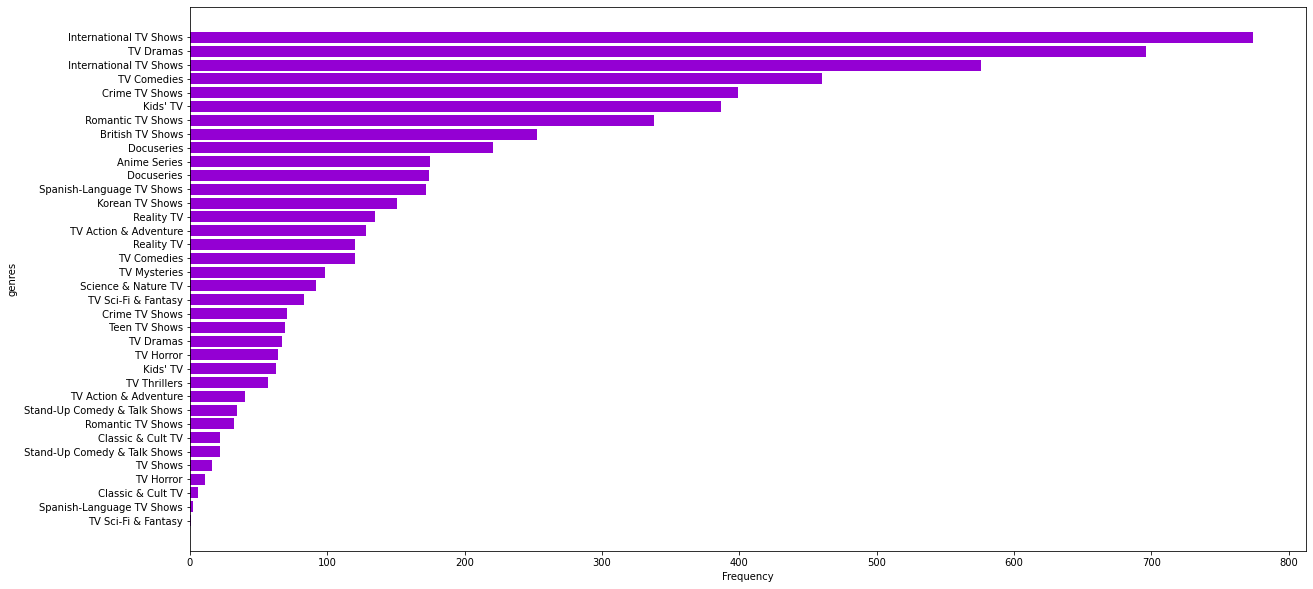

In [ ]:
df_genre = df_show_final.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
plt.figure(figsize=(20,10))
plt.barh(df_genre[::-1]['listed_in'],df_genre[::-1]['title'],color=['darkviolet'])
plt.xlabel('Frequency')
plt.ylabel('genres')
plt.show()

In [ ]:
df_international_shows_by_countries = df_show_final.loc[df_show_final['listed_in']=='International TV Shows']
df_international_shows_by_countries = df_international_shows_by_countries[['listed_in','country']]
df_international_shows_by_countries.head(40)

,listed_in,country
0,International TV Shows,South Africa
3,International TV Shows,South Africa
6,International TV Shows,South Africa
9,International TV Shows,South Africa
12,International TV Shows,South Africa
15,International TV Shows,South Africa
18,International TV Shows,South Africa
21,International TV Shows,South Africa
24,International TV Shows,South Africa
27,International TV Shows,South Africa


In [ ]:
df_international_shows_by_countries.drop(df_international_shows_by_countries.loc[df_international_shows_by_countries['country']=='NA'].index, inplace=True)
df_international_shows_by_countries.reset_index(drop=True,inplace=True)
df_international_shows_by_countries.value_counts()

listed_in               country        
International TV Shows  South Korea        987
                        Taiwan             549
                        India              349
                        Spain              303
                        Japan              286
                                          ... 
                         United Kingdom      5
                         South Korea         4
                                             4
                        New Zealand          1
                         Italy               1
Length: 77, dtype: int64

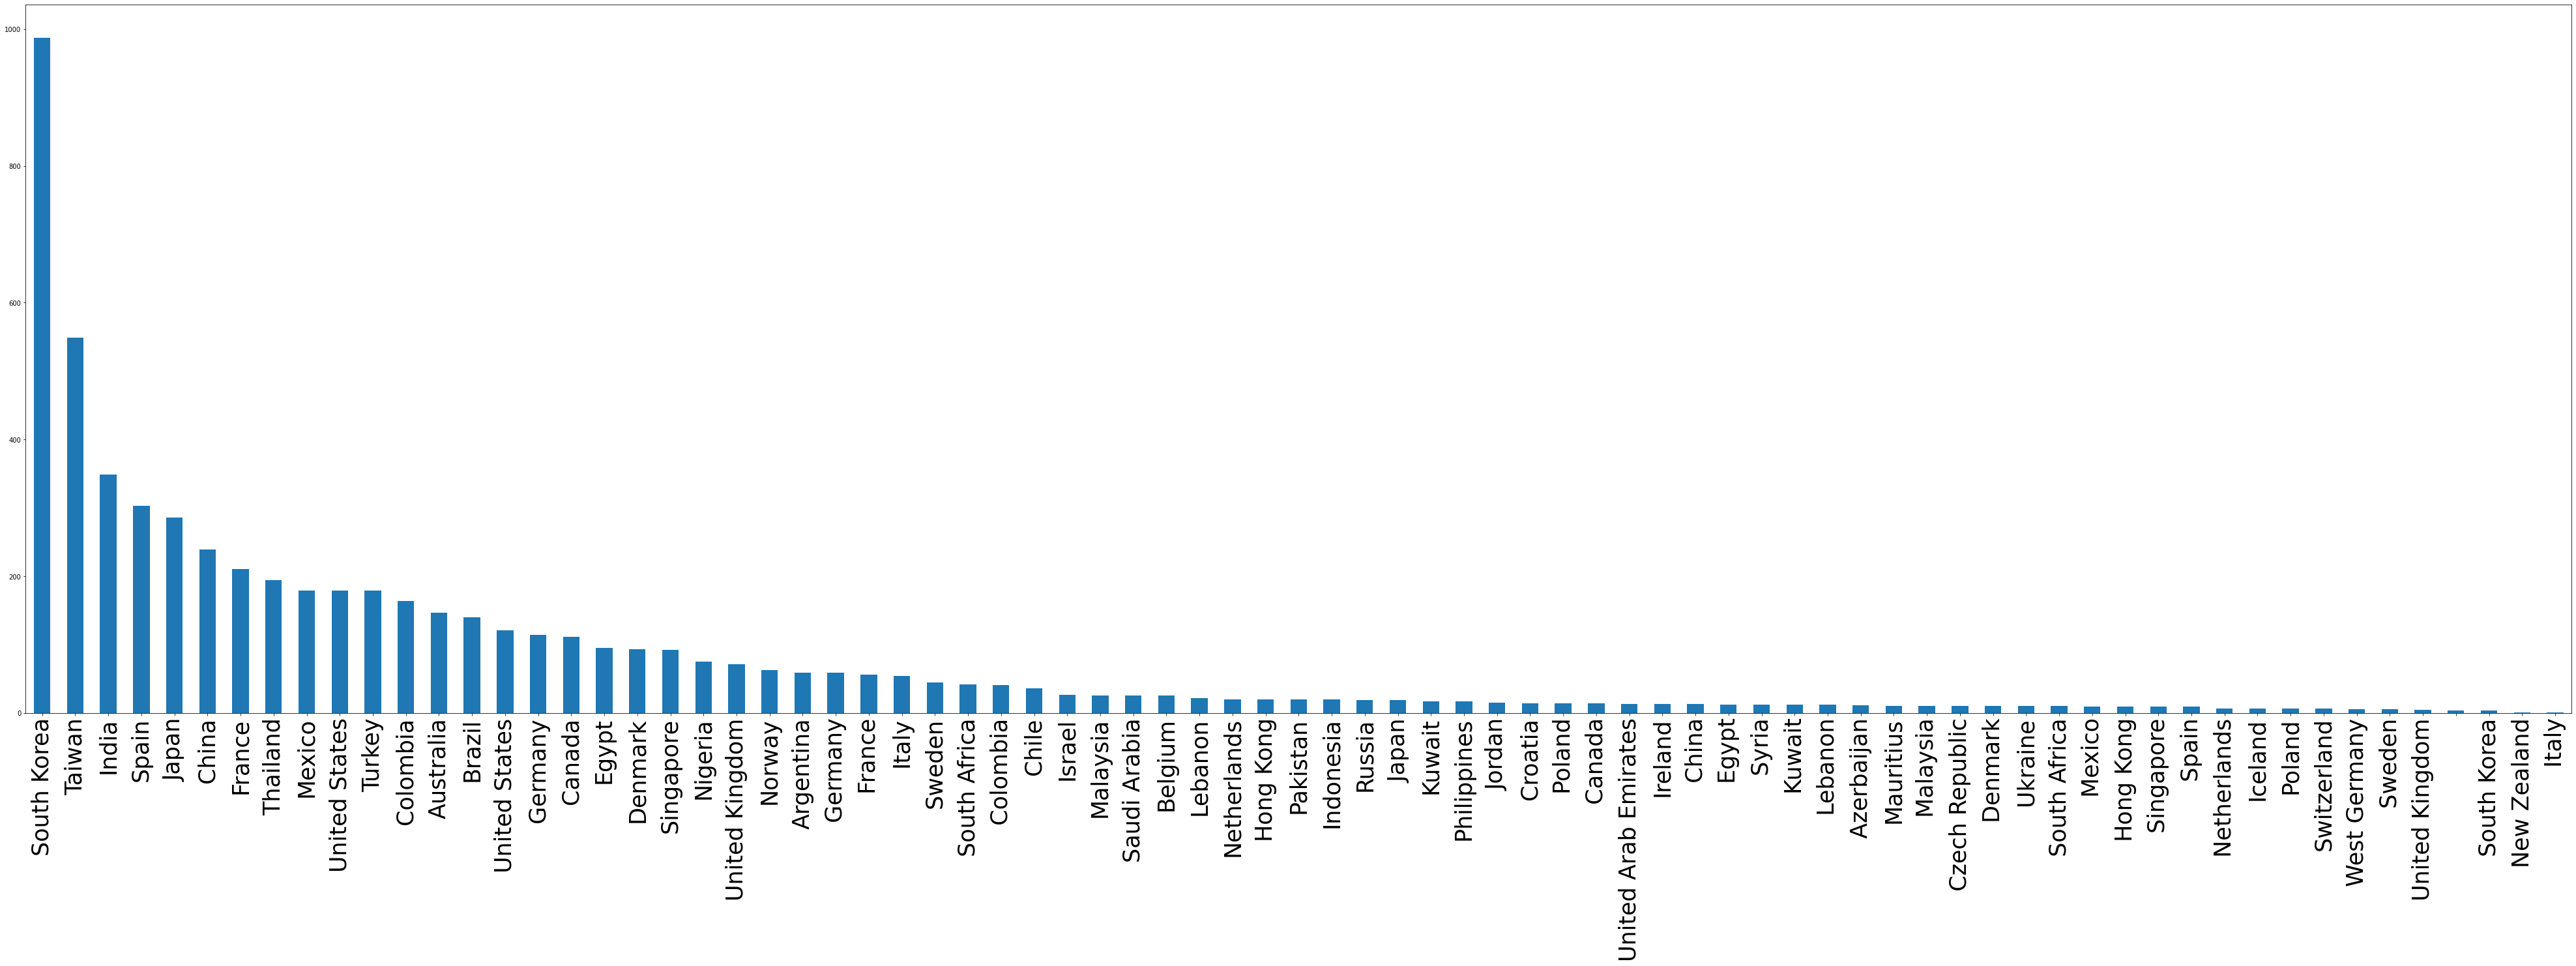

In [ ]:
df_international_shows_by_countries.country.value_counts().plot(kind='bar',figsize=(70,20))
xlabel='country'
ylabel= 'count of shows'
plt.xticks(fontsize=35)
plt.show()
#this shows that international tv shows are more popular in South Korea followed by Taiwan and then India

In [ ]:
#number of distinct titles based on the basis of the country
df_33= df_show_final.groupby(['country']).agg({'title':'nunique'})
df_33.tail(10)

,title
country,
Sweden,8
Switzerland,1
Taiwan,70
Thailand,24
Turkey,30
Ukraine,2
United Arab Emirates,1
United Kingdom,246
United States,847


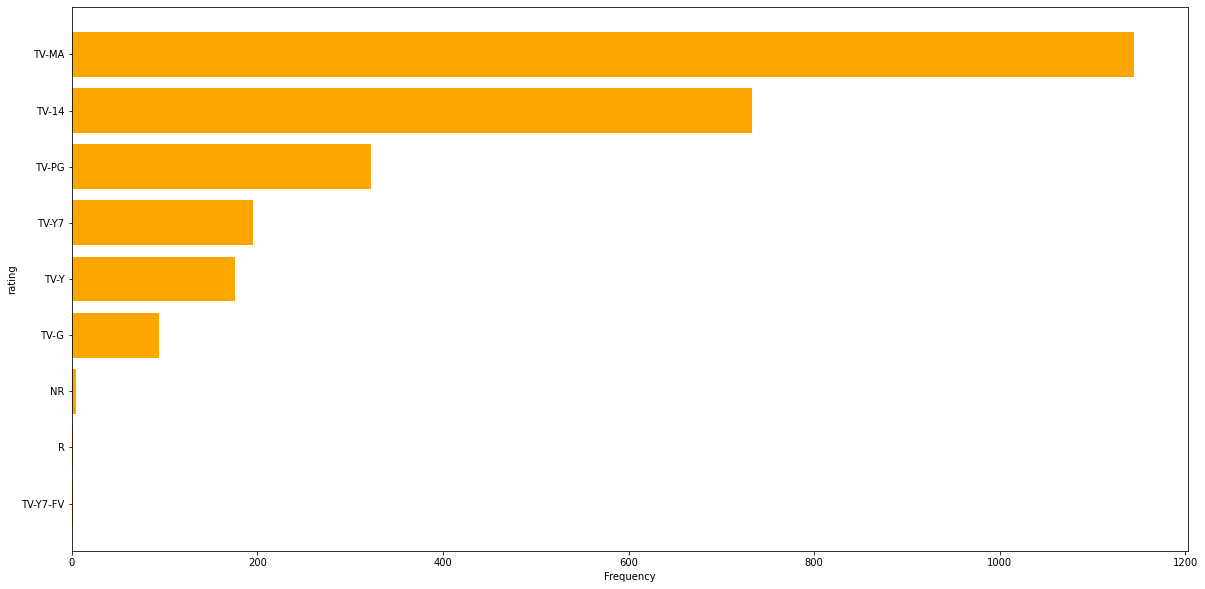

In [ ]:
df_rating1 = df_show_final.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
plt.figure(figsize=(20,10))
plt.barh(df_rating1[::-1]['rating'],df_rating1[::-1]['title'],color=['orange'])
plt.xlabel('Frequency')
plt.ylabel('rating')
plt.show()
#TV-MA shows are most popular followed by TV-14
#these are the most viewed rating category

In [ ]:
df_rating1.value_counts()

rating    title
NR        5        1
R         2        1
TV-14     733      1
TV-G      94       1
TV-MA     1145     1
TV-PG     323      1
TV-Y      176      1
TV-Y7     195      1
TV-Y7-FV  1        1
dtype: int64

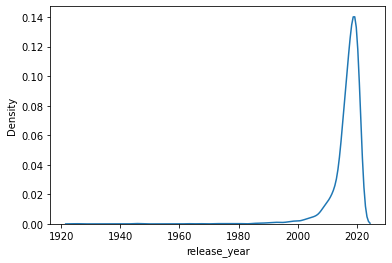

In [ ]:
sns.kdeplot(df_show['release_year'])

In [ ]:
df_show_final['country'].value_counts()

United States     11552
NA                 5698
Japan              4629
United Kingdom     4078
South Korea        3648
                  ...  
 Russia               4
New Zealand           4
Uruguay               3
 Israel               2
Czech Republic        1
Name: country, Length: 103, dtype: int64

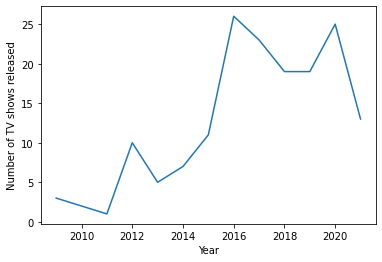

In [ ]:
df_show_SK = df_show_final.loc[df_show_final['country']=='South Korea']
df_movie_SK_release_year = df_show_SK[df_show_SK['release_year']>=1980].groupby(['release_year']).agg({'title':'nunique'}).reset_index()
sns.lineplot(data=df_movie_SK_release_year,x='release_year',y='title')
plt.ylabel("Number of TV shows released")
plt.xlabel("Year")
plt.show()

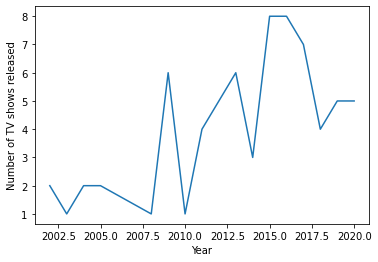

In [ ]:
df_show_TW = df_show_final.loc[df_show_final['country']=='Taiwan']
df_movie_TW_release_year = df_show_TW[df_show_TW['release_year']>=1980].groupby(['release_year']).agg({'title':'nunique'}).reset_index()
sns.lineplot(data=df_movie_TW_release_year,x='release_year',y='title')
plt.ylabel("Number of TV shows released")
plt.xlabel("Year")
plt.show()

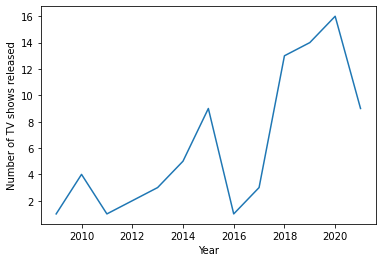

In [ ]:
df_show_India = df_show_final.loc[df_show_final['country']=='India']
df_movie_India_release_year = df_show_India[df_show_India['release_year']>=1980].groupby(['release_year']).agg({'title':'nunique'}).reset_index()
sns.lineplot(data=df_movie_India_release_year,x='release_year',y='title')
plt.ylabel("Number of TV shows released")
plt.xlabel("Year")
plt.show()

In [ ]:
df_show_final.head()

,title,actor,director,country,listed_in,show_id,date_added,release_year,rating,duration,description
0,Blood & Water,Ama Qamata,Unknown director,South Africa,International TV Shows,s2,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t..."
1,Blood & Water,Ama Qamata,Unknown director,South Africa,TV Dramas,s2,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,Unknown director,South Africa,TV Mysteries,s2,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Khosi Ngema,Unknown director,South Africa,International TV Shows,s2,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,Unknown director,South Africa,TV Dramas,s2,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t..."


In [ ]:
df_show_final['actor'].value_counts()

Unknown actor             818
David Attenborough         82
 Takahiro Sakurai          54
 Yuki Kaji                 41
 Ai Kayano                 39
                         ... 
 Blue Chapman               1
 Kirikou S'hai Muldrow      1
 Thierry Mercier            1
 Matthew Géczy              1
Jason Bolden                1
Name: actor, Length: 15489, dtype: int64

In [ ]:
df_show_actor_count = df_show_final.groupby(['actor']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
df_show_actor_count = df_show_actor_count[df_show_actor_count['actor']!='Unknown actor']
plt.figure(figsize=(20,100))
plt.barh(df_show_actor_count[::-1]['actor'],df_show_actor_count[::-1]['title'],color=['indigo'])
plt.xlabel('Number of TV shows')
plt.ylabel('popular actors')
plt.show()

In [ ]:
df_movie_final['listed_in'].value_counts()

In [ ]:
df_show_final['listed_in'].value_counts()

7.Business Insights

We can see that the number of movies per year has increased over the years due to advancement in technology and increase in purchasing power of people.Thus this trend will continue to grow unless something unfortunate happens eg global pandemic,global economic slowdown,cyber attack etc

International movies are more popular in India followed by Spain and then Phillipines.This might be due to the reason that most international movies are in English and a huge population of India can understand English

TV-MA movies are most popular followed by TV-14,these are the most viewed rating category

From year 1980-2020
The number of movies released in US increased till about 2017 where it peaked and fell down drastically in 2020 starting from 2018
In 2005 , it slightly went down but increased again till 2017

The number of movies released in India increased till about 2017 where it peaked and fell down drastically in 2020 starting from 2018
There were slight ups and downs in the years between 2005-2012 but the general trend seemed to be positive.

The same situation prevailed in the UK too


Number of TV shows have also increased yearwise

International tv shows are more popular in South Korea followed by Taiwan and then India

TV-MA rating shows are most popular followed by TV-14 rating ie these are the most viewed rating category

In South Korea, the number of TV shows peaked around 2015-2016 went down after that and reached a second peak in 2019-2020

In Taiwan, the TV show viewership fluctuates every 2-3 years and it peaked around the year 2015-2016

In India, the number of TV shows increased from 2011-2015, fell in 2016 and then increased at a brisk rate post 2016 end and again fell around the year 2020

In TV shows, David Attenborough is the most populated actor followed by Takahiro Sakurai.

Netflix has more number of movies than TV shows(roughly 70%-30%)


8.Recommendations

The most popular genres across the countries for movies is International Movies followed by Dramas
The most popular genres across the countries for TV shows is TV Dramas foloowed by International TV Shows
So aligning to this content is recommended

Sum of international TV shows is maximum , hence investing or streaming this type of shows will increase revenue

For the movie audience,80-120 mins is the ideal length with the average length being 99.57 min.

Anime genre for Japan and romantic genre in TV shows for South Korean audiences is recommended

While creating content the popular directors and actors are to be taken into consideration for that country.
The director-actor combination is also highly recommended

The target audience in USA and India is recommended to be 14+ and above ratings while for UK it is recommended to be completely mature content
